# This is the primary project file. 


### This file runs through several models to get initial baseline scores. Then processes wine data, and gets scores based on several data processing ways, to determine best scores in attempting to predict if a wine will be reviewed as "good or bad".


License: UC Irvine Machine Learning Repository

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

DOI: 10.24432/C56S3T

https://archive.ics.uci.edu/dataset/186/wine+quality

### Install required dependencies and read in csv data

In [1]:
# Import dependencies
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
import models as tests
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read in html data 
red_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Set column for red and white
red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

In [4]:
# Combine red and white dataframes
df = pd.concat([red_df, white_df], axis=0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## Create dataframes for baseline scores and processed scores

In [5]:
# Read in CSV data to run initial models for baseline results
df_initial = df.copy()

# Check column names, null values and Dtypes
df_initial.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [6]:
# Read in CSV data to attempt sampling for better results
df_sample = df.copy()

# Check column names, null values and Dtypes
df_sample.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


### Run initial data through models to get initial baseline scores

In [7]:
# Set X and y variables to determine initial baseline score
X0 = df_initial.drop(columns=['quality','wine_type'])
y0 = df_initial['quality']

In [8]:
# Split data into training and testing data
X_train0,X_test0,y_train0,y_test0 = train_test_split(X0,y0,random_state=13)


Random Forest 
Test Accuracy: 0.6726153846153846
balanced test score: 0.3510074145712444
classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.64      0.15      0.24        48
           5       0.70      0.74      0.72       528
           6       0.64      0.77      0.70       705
           7       0.71      0.46      0.56       282
           8       0.95      0.33      0.49        54
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1625
   macro avg       0.52      0.35      0.39      1625
weighted avg       0.68      0.67      0.66      1625



c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Gradient Boost 
Test Accuracy: 0.5889230769230769
balanced test score: 0.26994130770726515

 classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.12      0.04      0.06        48
           5       0.63      0.67      0.65       528
           6       0.57      0.71      0.64       705
           7       0.59      0.31      0.41       282
           8       0.89      0.15      0.25        54
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1625
   macro avg       0.40      0.27      0.29      1625
weighted avg       0.59      0.59      0.57      1625


Logistic Regression 
Test Accuracy: 0.540923076923077
balanced test score: 0.21556138896564428
classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        48


c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being 


Poly Support Vector 
Test Accuracy: 0.5347692307692308
Balanced test score: 0.2061550151975684
classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        48
           5       0.62      0.54      0.58       528
           6       0.50      0.78      0.61       705
           7       0.52      0.12      0.20       282
           8       0.00      0.00      0.00        54
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1625
   macro avg       0.24      0.21      0.20      1625
weighted avg       0.51      0.53      0.49      1625


ADA low estimators 
Test Accuracy: 0.344
balanced test score: 0.23277674706246135
classification report: 
               precision    recall  f1-score   support

           3       0.01      0.71      0.03         7
           4       0.00      0.00      0.00        48
           

c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-p


ADA 
Test Accuracy: 0.22707692307692307
balanced test score: 0.2492914380452374
classification report: 
               precision    recall  f1-score   support

           3       0.01      0.71      0.03         7
           4       0.04      0.42      0.07        48
           5       0.49      0.27      0.34       528
           6       0.45      0.25      0.32       705
           7       0.42      0.10      0.16       282
           8       0.00      0.00      0.00        54
           9       0.00      0.00      0.00         1

    accuracy                           0.23      1625
   macro avg       0.20      0.25      0.13      1625
weighted avg       0.43      0.23      0.28      1625



c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SVC Sigmoid 
Test Accuracy: 0.4338461538461538
balanced test score: 0.20026135212305426
classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.08      0.17      0.11        48
           5       0.47      0.46      0.46       528
           6       0.46      0.56      0.50       705
           7       0.43      0.22      0.29       282
           8       0.00      0.00      0.00        54
           9       0.00      0.00      0.00         1

    accuracy                           0.43      1625
   macro avg       0.21      0.20      0.20      1625
weighted avg       0.43      0.43      0.42      1625



c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


non-tuned models dataframe
                     Trained Score  Test Score  Balanced Test Score  \
Model Name                                                            
Random Forest             1.000000    0.672615             0.351007   
Gradient Boosting         0.713054    0.588923             0.269941   
ADA boost                 0.234606    0.227077             0.249291   
ADA Low Estimators        0.366174    0.344000             0.232777   
Logistic Regression       0.542693    0.540923             0.215561   
SVC poly                  0.580665    0.534769             0.206155   
SVC sigmoid               0.433703    0.433846             0.200261   

                     Balanced Difference  
Model Name                                
Random Forest                   0.648993  
Gradient Boosting               0.430798  
ADA boost                      -0.048019  
ADA Low Estimators             -0.046457  
Logistic Regression             0.015383  
SVC poly                        

c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



best results:
            n_estimators  max_depth  min_split  max_leaf  min_samples_leaf  \
test_score                                                                   
0.264433              88         17          2       191                 4   
0.264433              88         17          4       191                 4   
0.264433              88         17          6       191                 4   
0.264433              88         17          8       191                 4   
0.264064              96         15          8       191                 3   
...                  ...        ...        ...       ...               ...   
0.253557              88         15          6       173                 6   
0.253557              88         15          4       173                 6   
0.253557              88         15          8       173                 6   
0.253557              88         15          2       173                 6   
0.253557              88         15         10   

c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


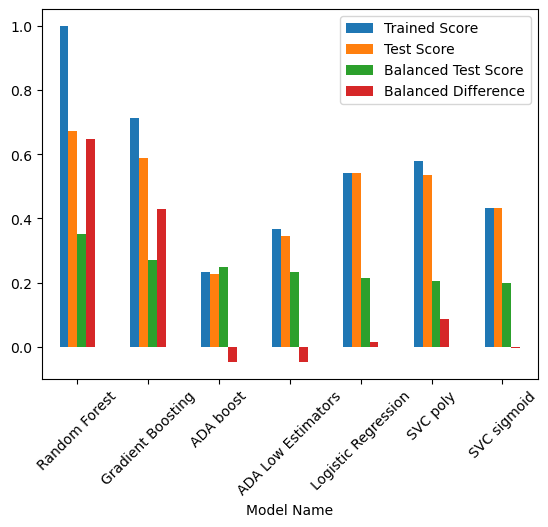

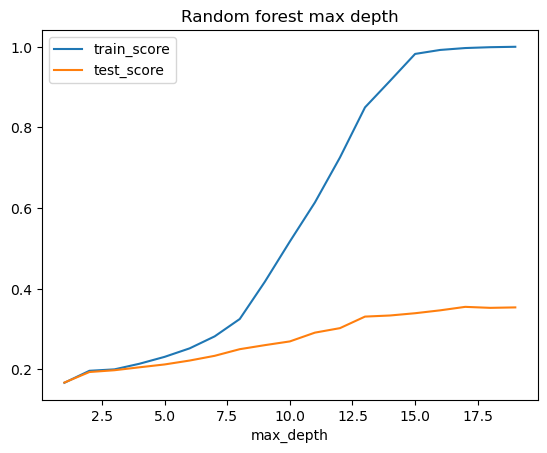

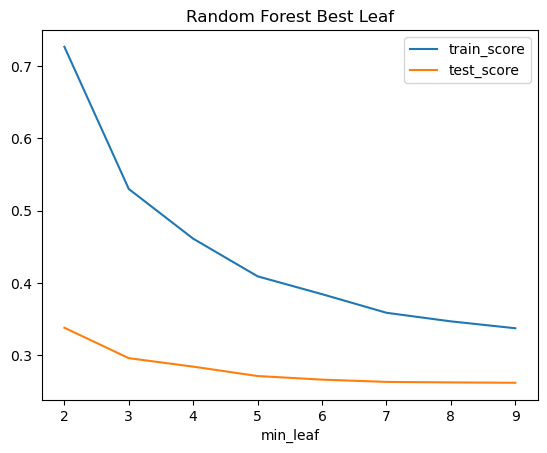

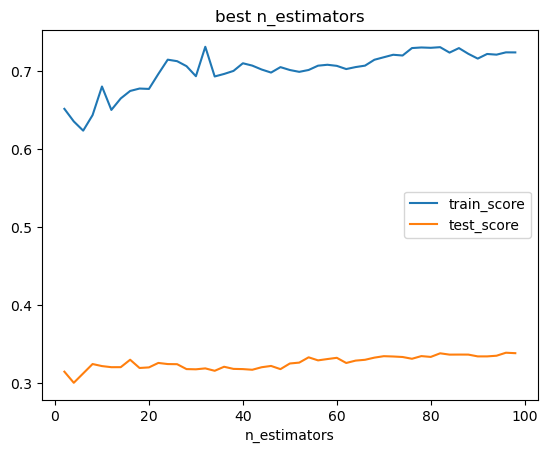

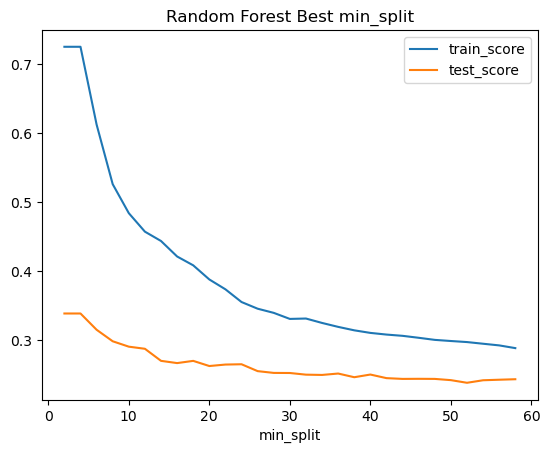

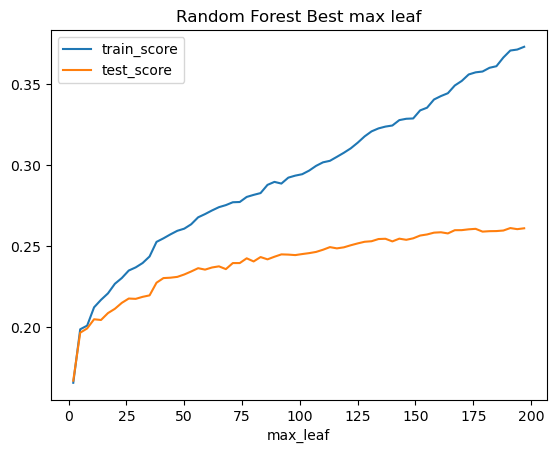

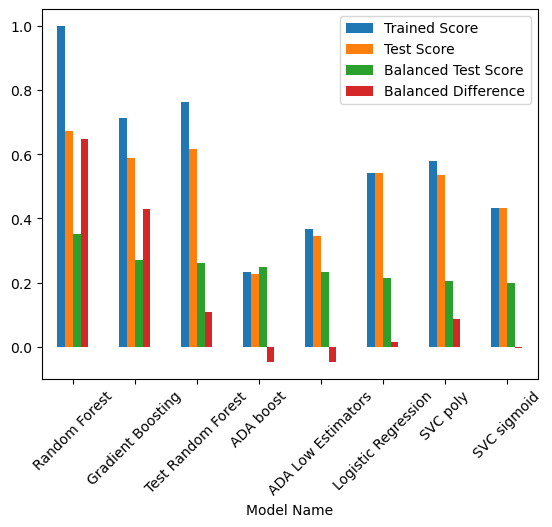

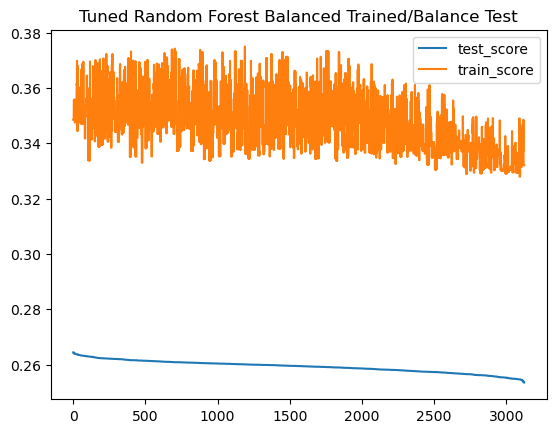

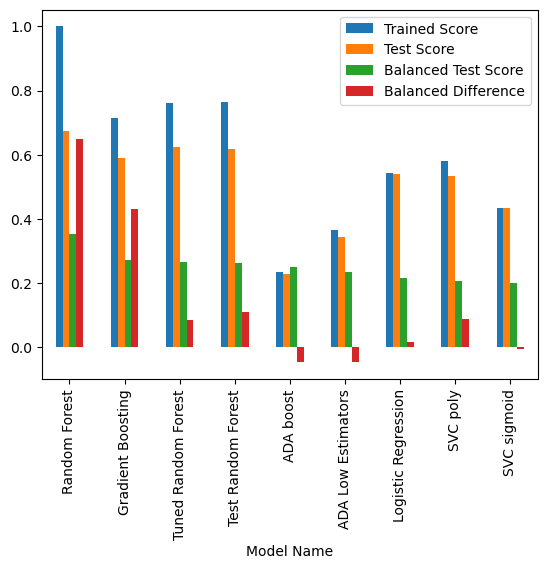

In [9]:
# Run initial data through many_models to get baseline scores
# Run data through  function to determine scores and initial parameter optimization for Random Forest Classifier Model
models_full_preprocess = tests.many_models_full(X_train0,y_train0,X_test0,y_test0)

## Process Data for using in machine learning models
### Bin into good and bad categories

In [9]:
# Check unique values of quality column
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [10]:
# Check how many of each value to pick where to create good/bad thresholds
df['quality'].value_counts(normalize=True)

quality
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: proportion, dtype: float64

In [11]:
# Create threshold for bad category
threshold = 6
df['quality'] = df['quality'].where(df['quality'] > threshold, other=0)

# Check quality column for unique value changes
print(df['quality'].unique())

[0 7 8 9]


In [12]:
# Create threshold for good category
threshold = 7
df['quality'] = df['quality'].where(df['quality'] < threshold, other=1)

# Check quality column for unique value changes
print(df['quality'].unique())

[0 1]


In [13]:
# Check value percentages
df['quality'].value_counts(normalize=True)

quality
0    0.803448
1    0.196552
Name: proportion, dtype: float64

### Sample data to determine if sampling or binning is better

In [14]:
# Check quality column value percentages to determine sampling
df_sample['quality'].value_counts(normalize=True)

quality
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: proportion, dtype: float64

In [15]:
# Check quality column values
df_sample['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [16]:
# Check quality column values mean
df_sample['quality'].value_counts().mean()

928.1428571428571

In [17]:
# Set columns as variables for sampling
df_3 = df_sample[df_sample.quality==3]               
df_4 = df_sample[df_sample.quality==4]               
df_5 = df_sample[df_sample.quality==5]     
df_6 = df_sample[df_sample.quality==6]     
df_7 = df_sample[df_sample.quality==7]     
df_8 = df_sample[df_sample.quality==8]
df_9 = df_sample[df_sample.quality==9]     

In [18]:
# Resample data to equalize values (based on mean after removing outlier numbers)
df_3_ups = resample(df_3, replace=True, n_samples=1300,random_state=13) 
df_4_ups = resample(df_4, replace=True, n_samples=1300,random_state=13) 
df_7_ups = resample(df_7, replace=True, n_samples=1300,random_state=13) 
df_8_ups = resample(df_8, replace=True, n_samples=1300,random_state=13)
df_9_ups = resample(df_9, replace=True, n_samples=1300,random_state=13)

# Decreases the rows of Majority one's to make balance data
df_5_downs = df_5[df_5.quality==5].sample(n=1300,random_state=13).reset_index(drop=True)
df_6_downs = df_6[df_6.quality==6].sample(n=1300,random_state=13).reset_index(drop=True)


In [19]:
# Combine sampled columns into dataframe
sampled_q = pd.concat([df_3_ups, df_4_ups, df_7_ups, 
                        df_8_ups, df_9_ups, df_5_downs, df_6_downs]).reset_index(drop=True)


# Display new sampled dataframe
sampled_q

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,white
1,7.9,0.640,0.46,10.60,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,3,white
2,8.5,0.260,0.21,16.20,0.074,41.0,197.0,0.99800,3.02,0.50,9.8,3,white
3,7.9,0.640,0.46,10.60,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,3,white
4,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,6.6,0.410,0.27,10.70,0.110,20.0,103.0,0.99672,3.08,0.41,9.0,6,white
9096,5.7,0.260,0.27,4.10,0.201,73.5,189.5,0.99420,3.27,0.38,9.4,6,white
9097,8.5,0.370,0.32,1.80,0.066,26.0,51.0,0.99456,3.38,0.72,11.8,6,red
9098,6.2,0.340,0.29,7.60,0.047,45.0,232.0,0.99550,3.35,0.62,10.0,6,white


## Check column importance and correlation to determine features to use

In [20]:
# Create initial Random Forest Classifier Model to determine feature importance
rf_importance = RandomForestClassifier(random_state=13)

# Fit data to initial Random Forest Classifier Model
rf_importance.fit(X_train0, y_train0)

RandomForestClassifier(random_state=13)

In [21]:
# Make predictions to determine feature importance
y_train_pred = rf_importance.predict(X_train0)
y_test_pred = rf_importance.predict(X_test0)

In [22]:
# Create variables to store accuracy_scores and Balanced Accuracy Score
train_accuracy = accuracy_score(y_train0, y_train_pred)
test_accuracy = accuracy_score(y_test0, y_test_pred)
balanced_test = balanced_accuracy_score(y_test0, y_test_pred)

# Show results of initial Random Forest Classifier Model
print(f'\nRandom Forest \nTrain Accuracy: {train_accuracy}\nTest Accuracy: {test_accuracy}\nBalanced Test Score: {balanced_test}')


Random Forest 
Train Accuracy: 1.0
Test Accuracy: 0.6726153846153846
Balanced Test Score: 0.3510074145712444


### Create feature importance instance to pick most important features

In [23]:
# Create variable to store most important features
importances = rf_importance.feature_importances_

# Sort most important features for better usage
importances_sorted = sorted(zip(importances, X0.columns), reverse=True)

# View most important features
print("Most Important Features:")

# Loop through to display features and importance percentage
for importance, feature in importances_sorted[:11]:
    print(f"{feature}: {importance:.4f}")

Most Important Features:
alcohol: 0.1241
density: 0.1041
volatile acidity: 0.1005
total sulfur dioxide: 0.0906
chlorides: 0.0894
sulphates: 0.0865
residual sugar: 0.0854
free sulfur dioxide: 0.0853
pH: 0.0816
citric acid: 0.0782
fixed acidity: 0.0743


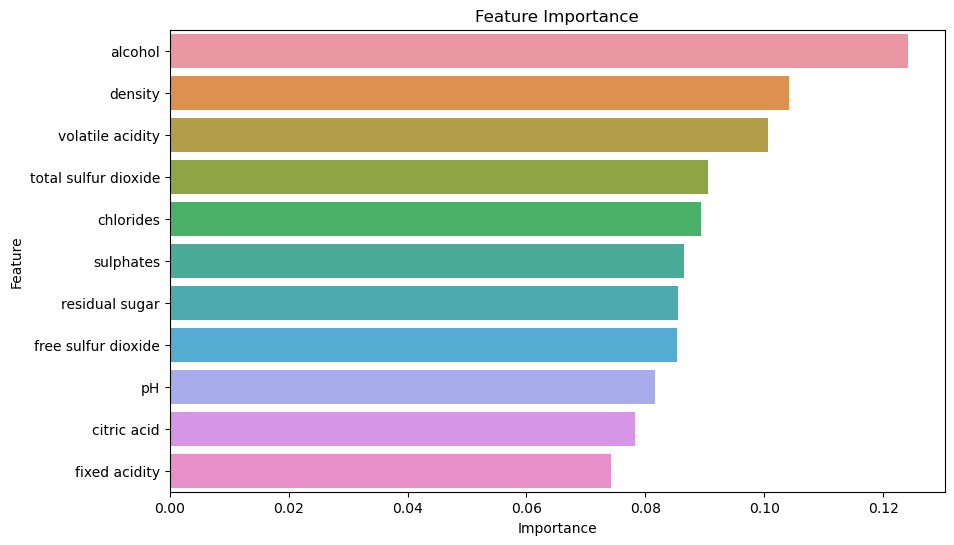

In [24]:
# Create variable to plot feature importance
feature_importance_df = pd.DataFrame(importances_sorted, columns=['Importance', 'Feature']).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Drop features based on importance

In [25]:
# Drop columns based on feature importance and correlations, and set as X and y variables for sample data
X = sampled_q.drop(columns=['quality','fixed acidity','citric acid','wine_type'])
y = sampled_q['quality']
X, y

(      volatile acidity  residual sugar  chlorides  free sulfur dioxide  \
 0                0.550           15.55      0.057                 35.5   
 1                0.640           10.60      0.244                 33.0   
 2                0.260           16.20      0.074                 41.0   
 3                0.640           10.60      0.244                 33.0   
 4                0.815            1.20      0.267                 16.0   
 ...                ...             ...        ...                  ...   
 9095             0.410           10.70      0.110                 20.0   
 9096             0.260            4.10      0.201                 73.5   
 9097             0.370            1.80      0.066                 26.0   
 9098             0.340            7.60      0.047                 45.0   
 9099             0.500            2.00      0.069                 21.0   
 
       total sulfur dioxide  density    pH  sulphates  alcohol  
 0                    366.5  1.00

In [26]:
# Drop columns based on feature importance and correlation, and set as X and y variables for bins models tests
X1 = df.drop(columns=['quality','fixed acidity','citric acid','wine_type'])
y1 = df['quality']
X1, y1

(      volatile acidity  residual sugar  chlorides  free sulfur dioxide  \
 0                 0.70             1.9      0.076                 11.0   
 1                 0.88             2.6      0.098                 25.0   
 2                 0.76             2.3      0.092                 15.0   
 3                 0.28             1.9      0.075                 17.0   
 4                 0.70             1.9      0.076                 11.0   
 ...                ...             ...        ...                  ...   
 4893              0.21             1.6      0.039                 24.0   
 4894              0.32             8.0      0.047                 57.0   
 4895              0.24             1.2      0.041                 30.0   
 4896              0.29             1.1      0.022                 20.0   
 4897              0.21             0.8      0.020                 22.0   
 
       total sulfur dioxide  density    pH  sulphates  alcohol  
 0                     34.0  0.99

## Use processed data to determine best scores
### split data into training and test variables

In [27]:
# Split dropped column data into training and testing data for sampled data tests
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13)

In [28]:
# Split dropped column data into training and testing data for bins models tests
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,random_state=13)

### Run bin data through many_models functions to determine best scores

Binned Data results full

Random Forest 
Test Accuracy: 0.8769230769230769
balanced test score: 0.7383194795141641
classification report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1288
           1       0.84      0.50      0.63       337

    accuracy                           0.88      1625
   macro avg       0.86      0.74      0.78      1625
weighted avg       0.87      0.88      0.86      1625


Gradient Boost 
Test Accuracy: 0.827076923076923
balanced test score: 0.6444329763901432

 classification report: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1288
           1       0.67      0.33      0.44       337

    accuracy                           0.83      1625
   macro avg       0.76      0.64      0.67      1625
weighted avg       0.81      0.83      0.80      1625


Logistic Regression 
Test Accuracy: 0.8104615384615385
balanced test score: 0.5978007446

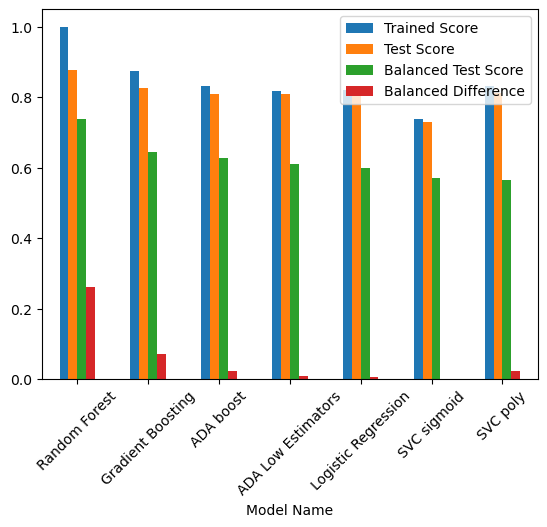

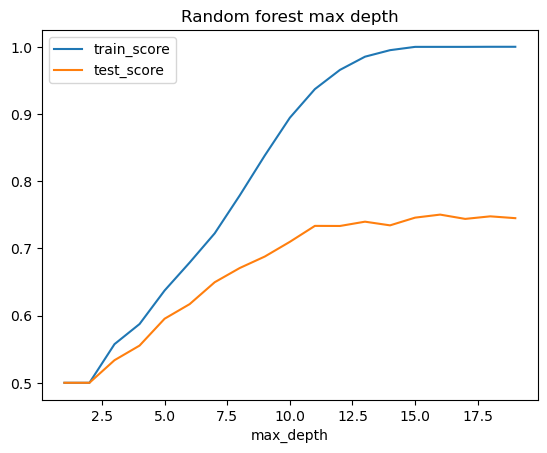

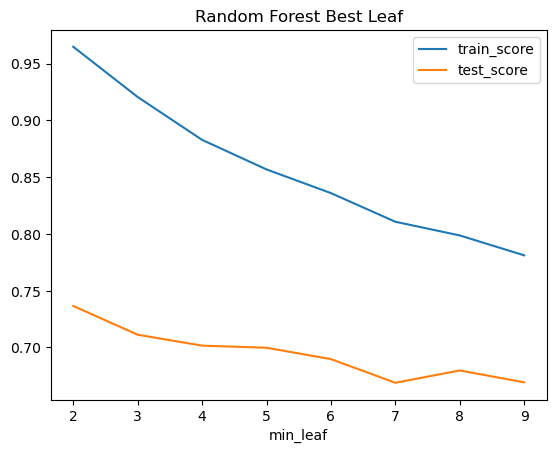

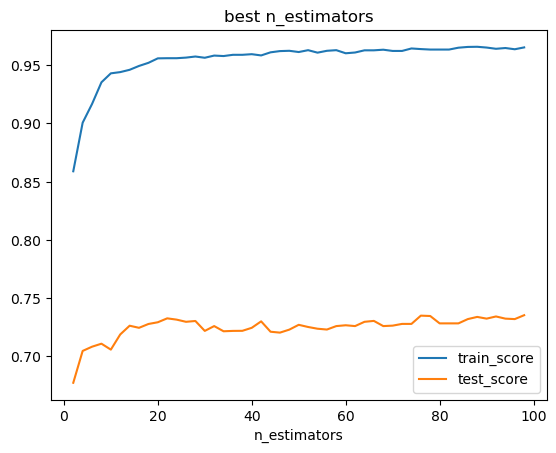

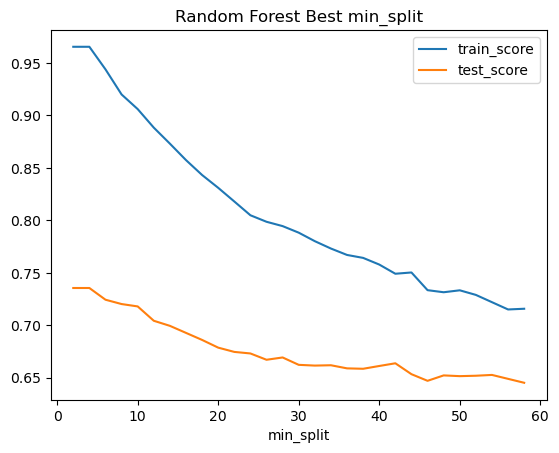

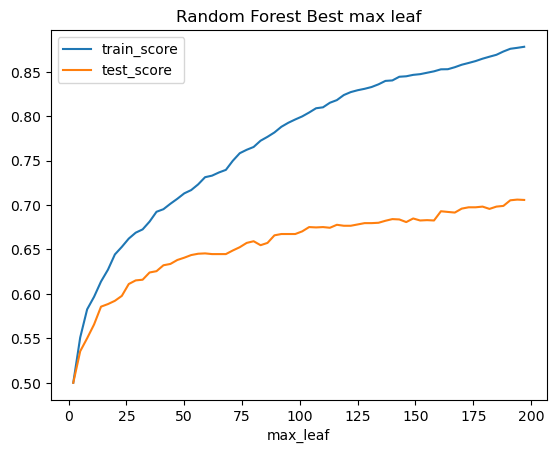

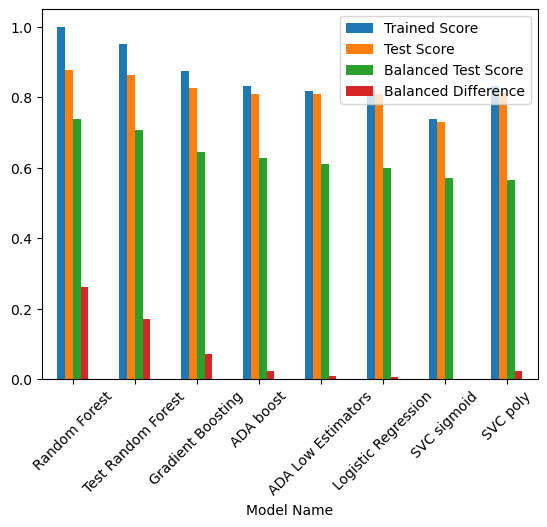

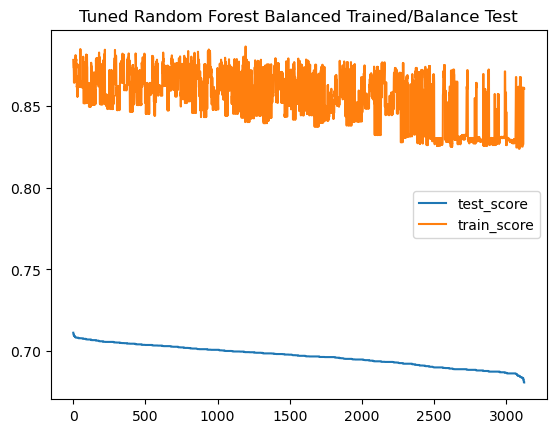

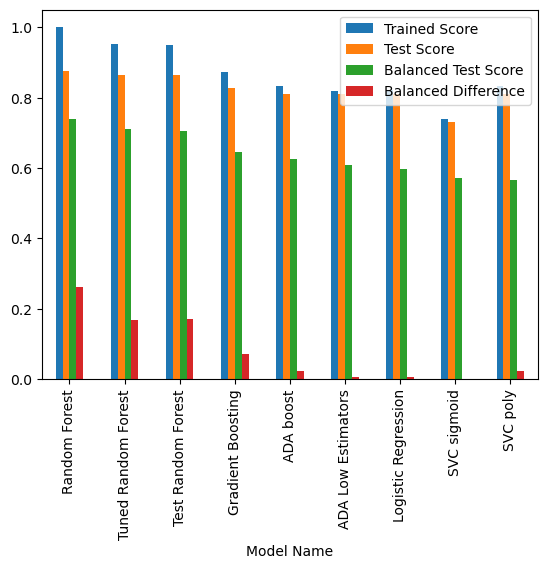

In [30]:
# Run data through many_models_full function to determine scores and optimize Random Forest Classifier Model
print('Binned Data results full')
models_full_bin = tests.many_models_full(X_train1,y_train1,X_test1,y_test1)

### Run sampled data through models

Sampled Data results Full

Random Forest 
Test Accuracy: 0.8584615384615385
balanced test score: 0.8533451749821559
classification report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00       324
           4       0.94      0.99      0.96       334
           5       0.72      0.66      0.69       314
           6       0.54      0.50      0.52       306
           7       0.77      0.83      0.80       334
           8       0.97      1.00      0.99       331
           9       1.00      1.00      1.00       332

    accuracy                           0.86      2275
   macro avg       0.85      0.85      0.85      2275
weighted avg       0.85      0.86      0.86      2275


Gradient Boost 
Test Accuracy: 0.7621978021978022
balanced test score: 0.7569931803023158

 classification report: 
               precision    recall  f1-score   support

           3       0.98      1.00      0.99       324
           4       0.80      0.84  

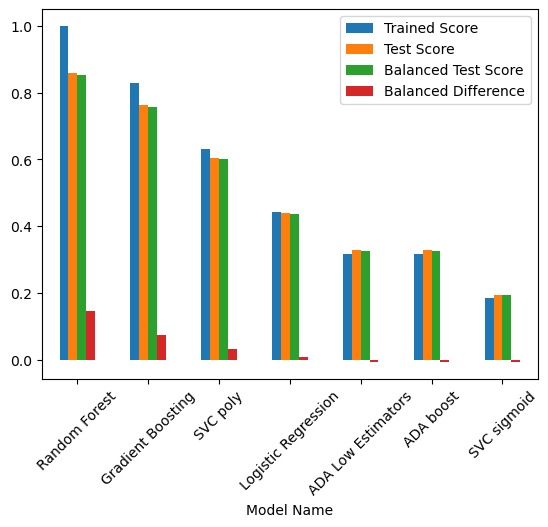

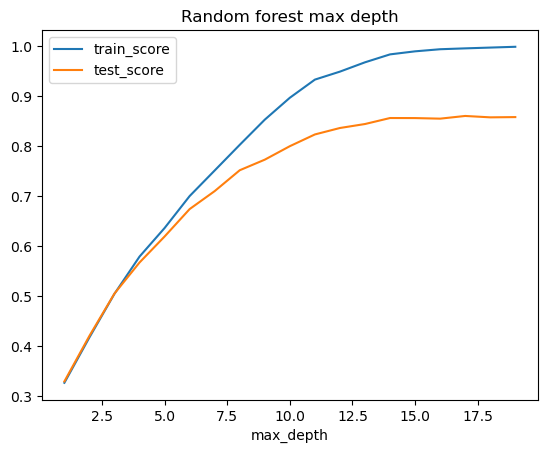

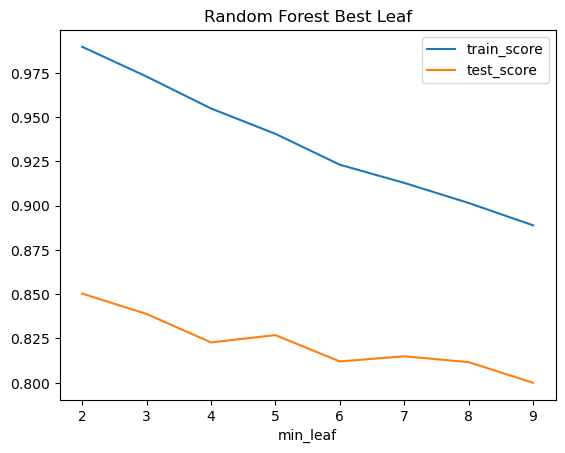

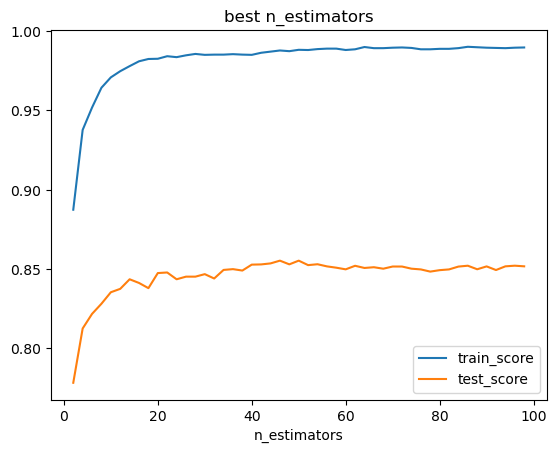

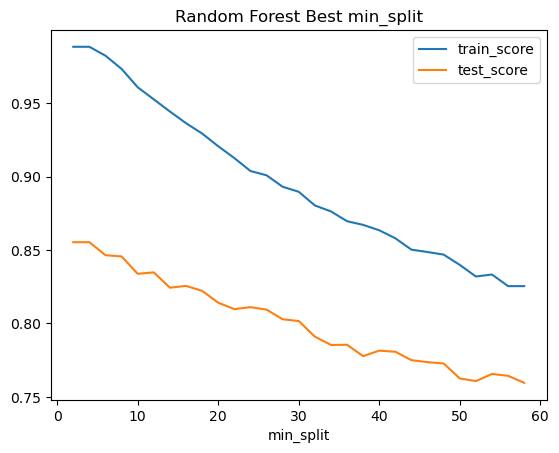

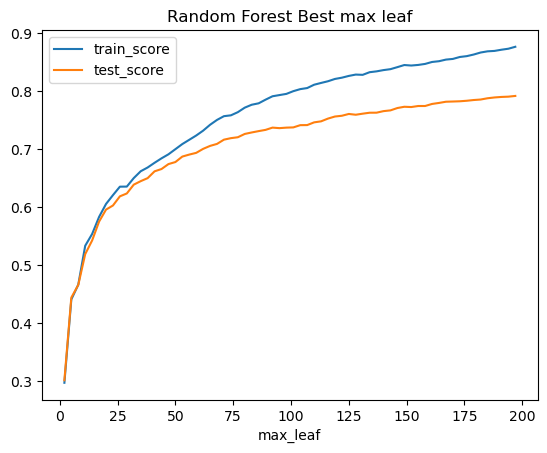

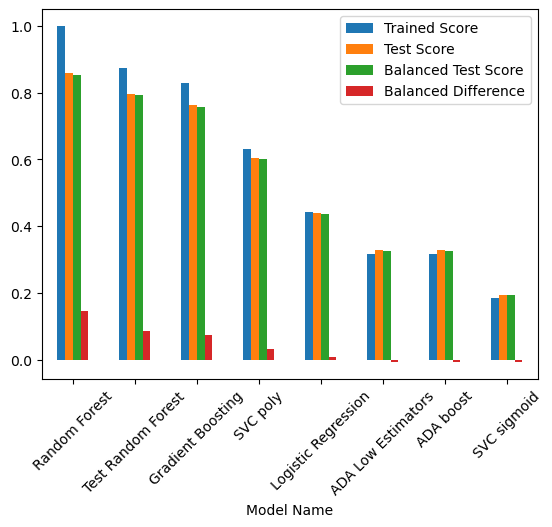

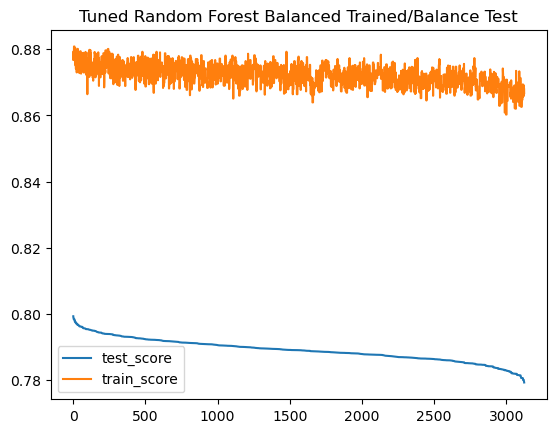

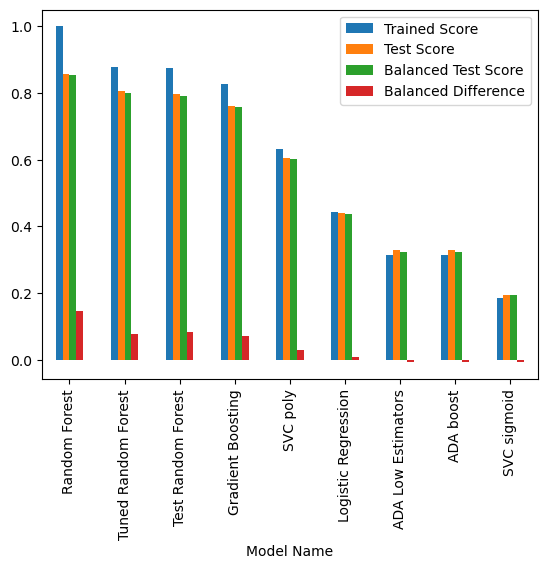

In [31]:
# Run sampled data through many_models_full function to determine scores and optimize Random Forest Classifier Model
print('Sampled Data results Full')
models_full_sample = tests.many_models_full(X_train,y_train,X_test,y_test)

## Test sampled data combined with binned data through models to determine good/bad wines
### Combine sampled data into bins

In [30]:
# Create a new dataframe for the combined processing data
combined_df = sampled_q.copy()
# View dataframe
combined_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,white
1,7.9,0.640,0.46,10.60,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,3,white
2,8.5,0.260,0.21,16.20,0.074,41.0,197.0,0.99800,3.02,0.50,9.8,3,white
3,7.9,0.640,0.46,10.60,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,3,white
4,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,6.6,0.410,0.27,10.70,0.110,20.0,103.0,0.99672,3.08,0.41,9.0,6,white
9096,5.7,0.260,0.27,4.10,0.201,73.5,189.5,0.99420,3.27,0.38,9.4,6,white
9097,8.5,0.370,0.32,1.80,0.066,26.0,51.0,0.99456,3.38,0.72,11.8,6,red
9098,6.2,0.340,0.29,7.60,0.047,45.0,232.0,0.99550,3.35,0.62,10.0,6,white


In [31]:
combined_df['quality'].value_counts()

quality
3    1300
4    1300
7    1300
8    1300
9    1300
5    1300
6    1300
Name: count, dtype: int64

In [32]:
# Create threshold for bad category
threshold = 6
combined_df['quality'] = combined_df['quality'].where(combined_df['quality'] > threshold, other=0)

# Check quality column for unique value changes
print(combined_df['quality'].unique())

[0 7 8 9]


In [33]:
# Create threshold for good category
threshold = 7
combined_df['quality'] = combined_df['quality'].where(combined_df['quality'] < threshold, other=1)

# Check quality column for unique value changes
print(combined_df['quality'].unique())
print(combined_df['quality'].value_counts())

[0 1]
quality
0    5200
1    3900
Name: count, dtype: int64


In [40]:
# Export cleaned CSV data
combined_df.to_csv('Cleaned_data.csv')

# View combined dataframe
combined_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,0,white
1,7.9,0.640,0.46,10.60,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,0,white
2,8.5,0.260,0.21,16.20,0.074,41.0,197.0,0.99800,3.02,0.50,9.8,0,white
3,7.9,0.640,0.46,10.60,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,0,white
4,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,6.6,0.410,0.27,10.70,0.110,20.0,103.0,0.99672,3.08,0.41,9.0,0,white
9096,5.7,0.260,0.27,4.10,0.201,73.5,189.5,0.99420,3.27,0.38,9.4,0,white
9097,8.5,0.370,0.32,1.80,0.066,26.0,51.0,0.99456,3.38,0.72,11.8,0,red
9098,6.2,0.340,0.29,7.60,0.047,45.0,232.0,0.99550,3.35,0.62,10.0,0,white


### split combined data into training and testing data

In [35]:
# Set X and y variables
X2 = combined_df.drop(['quality','fixed acidity','citric acid','wine_type'],axis=1)
y2 = combined_df['quality']

In [36]:
# Split into training and testing data
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,random_state=13)

### Run combined sampled and binned data through models

Combined Data results full leaf

Random Forest 
Test Accuracy: 0.9472527472527472
balanced test score: 0.9466560871974294
classification report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1278
           1       0.94      0.94      0.94       997

    accuracy                           0.95      2275
   macro avg       0.95      0.95      0.95      2275
weighted avg       0.95      0.95      0.95      2275


Gradient Boost 
Test Accuracy: 0.8971428571428571
balanced test score: 0.8968725425101596

 classification report: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1278
           1       0.87      0.89      0.88       997

    accuracy                           0.90      2275
   macro avg       0.89      0.90      0.90      2275
weighted avg       0.90      0.90      0.90      2275


Logistic Regression 
Test Accuracy: 0.7854945054945055
balanced test score: 0.78

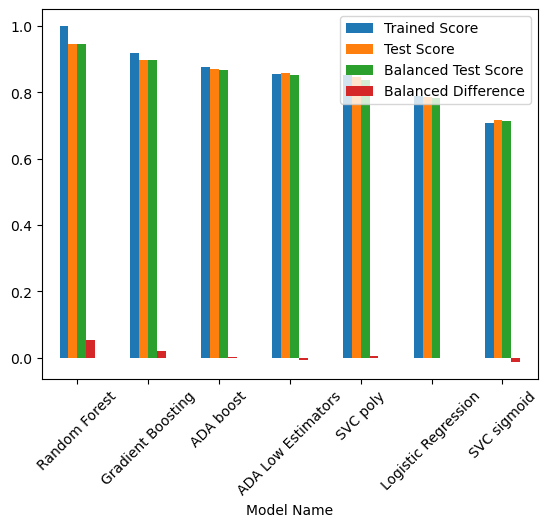

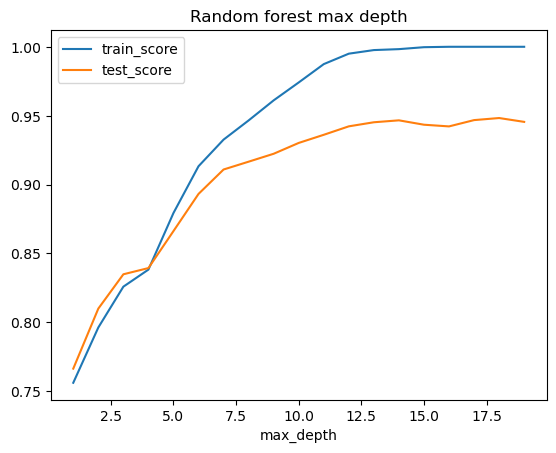

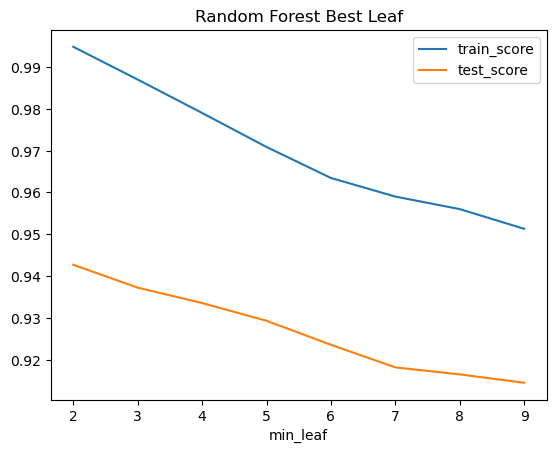

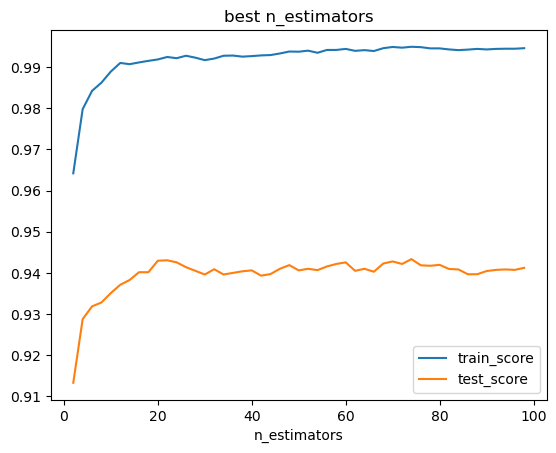

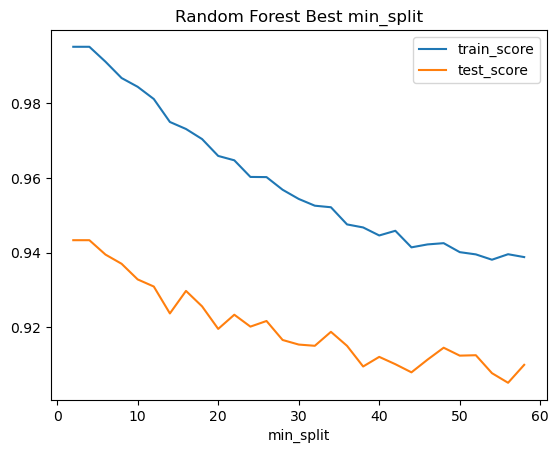

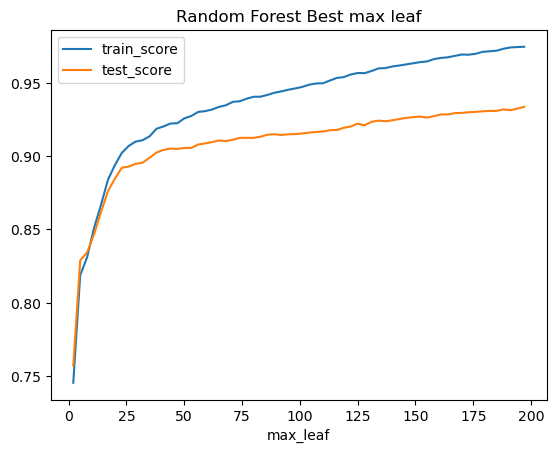

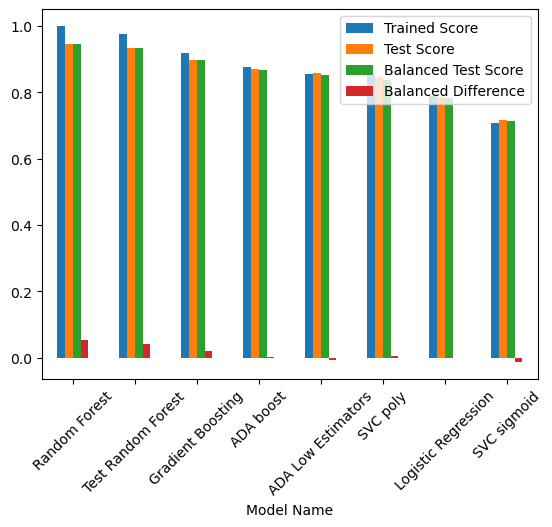

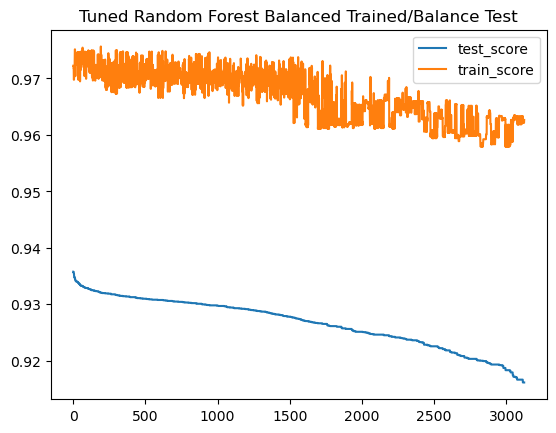

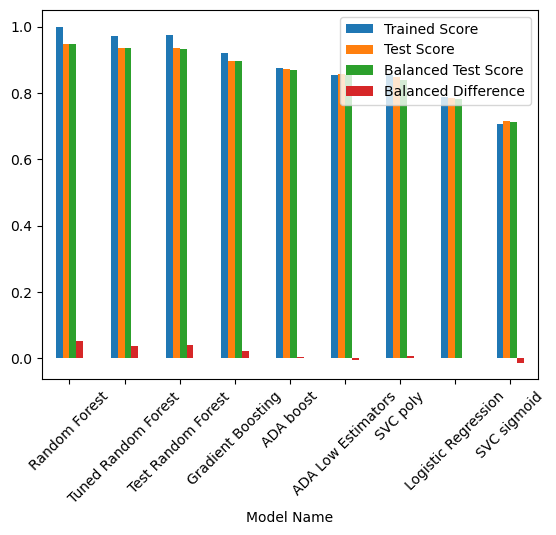

In [38]:
# Run combined data through many_models_full function to determine if all parameter settings are worth extra time.
# score and optimize Random Forest Classifier Model
print('Combined Data results full leaf')
models_full_combined = tests.many_models_full(X_train2,y_train2,X_test2,y_test2)

Combined Data results no min/max leaf

Random Forest 
Test Accuracy: 0.9472527472527472
balanced test score: 0.9466560871974294
classification report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1278
           1       0.94      0.94      0.94       997

    accuracy                           0.95      2275
   macro avg       0.95      0.95      0.95      2275
weighted avg       0.95      0.95      0.95      2275

               Trained Score  Test Score  Balanced Test Score  \
Model Name                                                      
Random Forest            1.0    0.947253             0.946656   

               Balanced Difference  
Model Name                          
Random Forest             0.053344  

Random Forest Parameter Tuning:
 
best depth balanced test score: 
    train_score  test_score  max_depth
17     1.000000    0.948271         18
16     1.000000    0.946766         17
13     0.998291    0.946596 

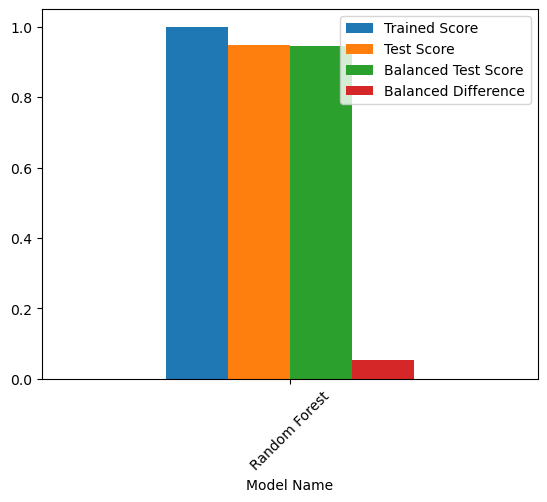

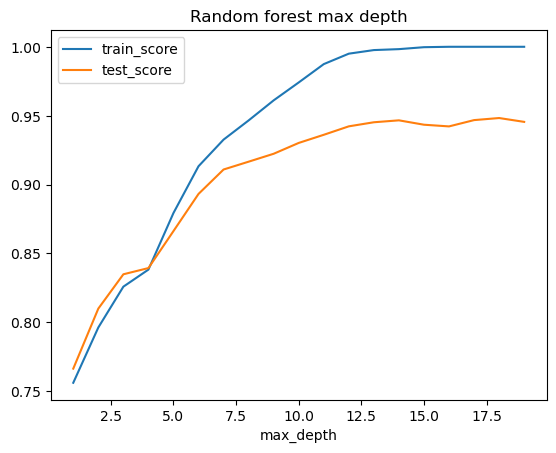

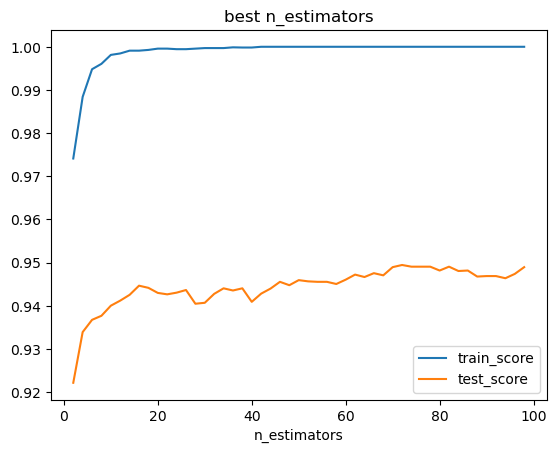

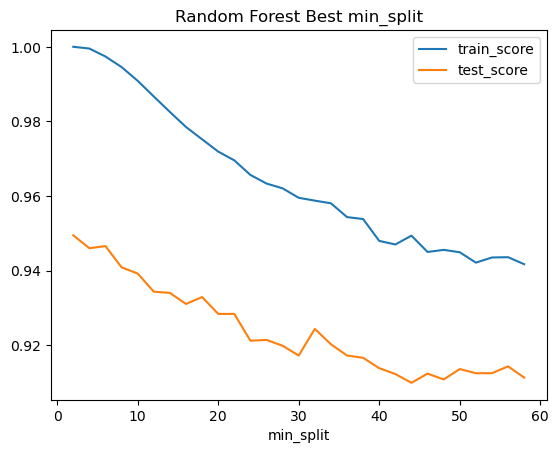

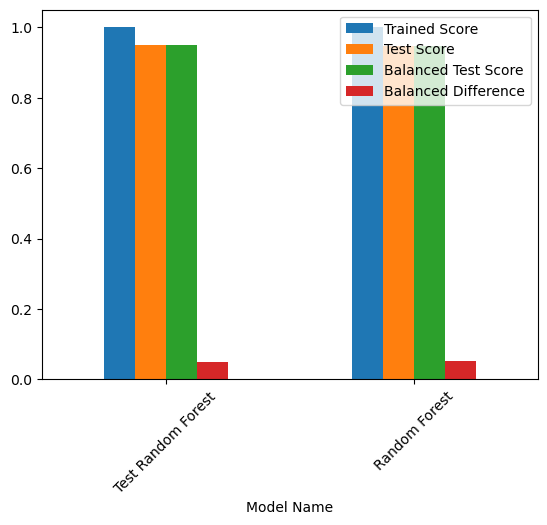

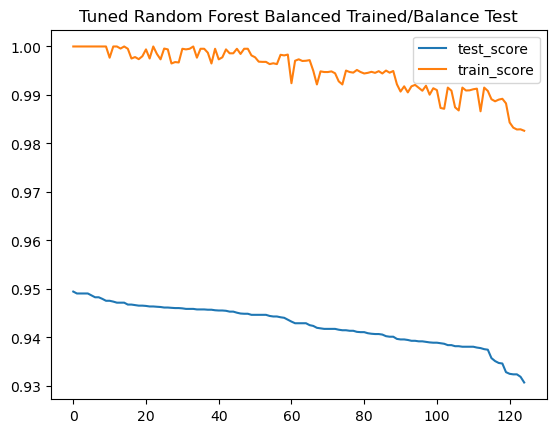

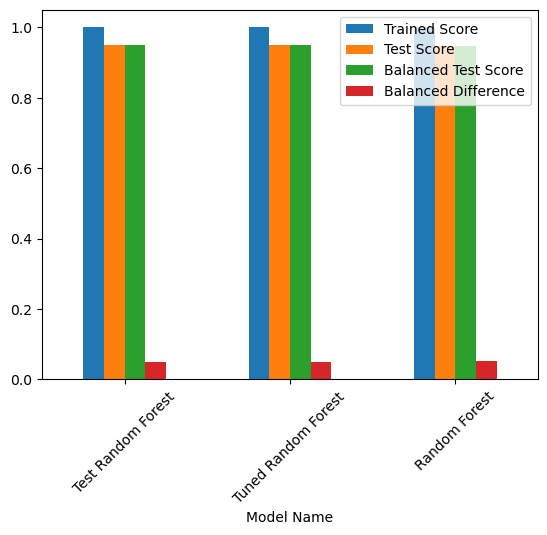

In [40]:
# Run combined data through many_models_no_leaf function to determine if 'no min/max leaf' parameter setting is worth extra time.
# score and optimize Random Forest Classifier Model
print('Combined Data results no min/max leaf')
models_no_leaf_combined = tests.many_models_no_leaf(X_train2,y_train2,X_test2,y_test2)

Combined Data results min leaf

Random Forest 
Test Accuracy: 0.9472527472527472
balanced test score: 0.9466560871974294
classification report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1278
           1       0.94      0.94      0.94       997

    accuracy                           0.95      2275
   macro avg       0.95      0.95      0.95      2275
weighted avg       0.95      0.95      0.95      2275

non-tuned models dataframe
               Trained Score  Test Score  Balanced Test Score  \
Model Name                                                      
Random Forest            1.0    0.947253             0.946656   

               Balanced Difference  
Model Name                          
Random Forest             0.053344  

Random Forest Parameter Tuning:
 
best depth balanced test score: 
    train_score  test_score  max_depth
17     1.000000    0.948271         18
16     1.000000    0.946766         17
13     0

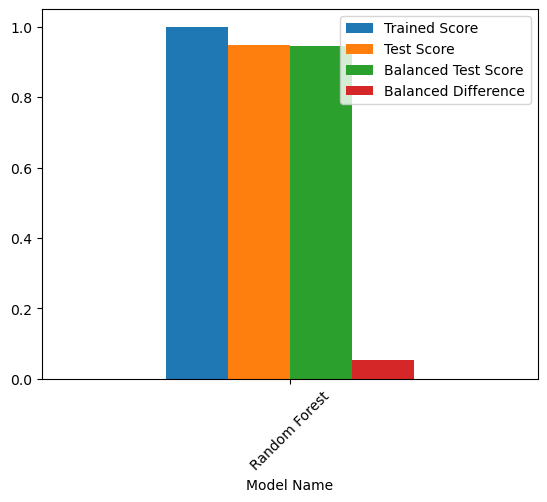

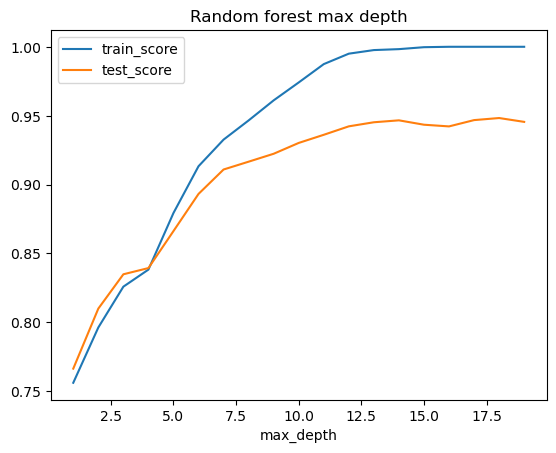

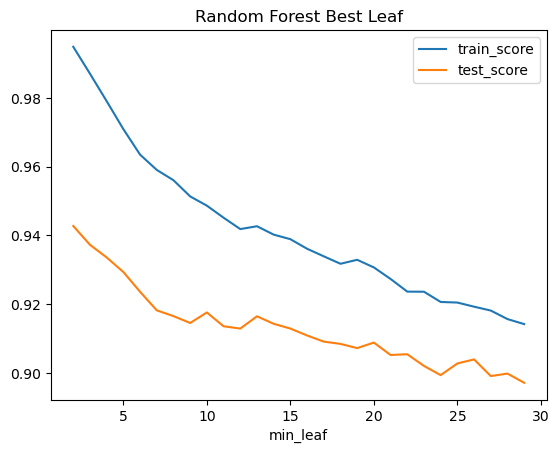

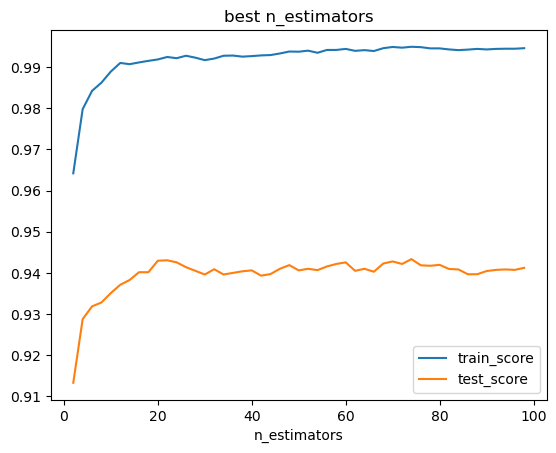

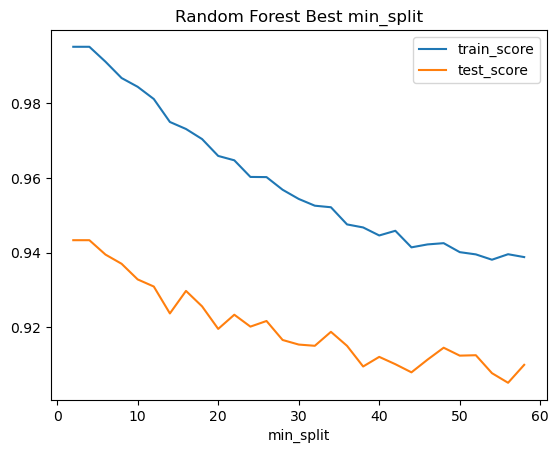

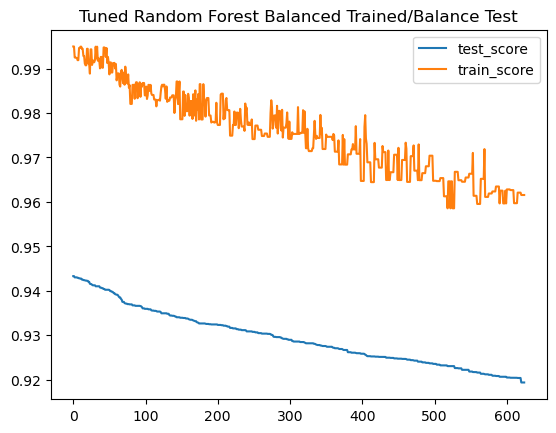

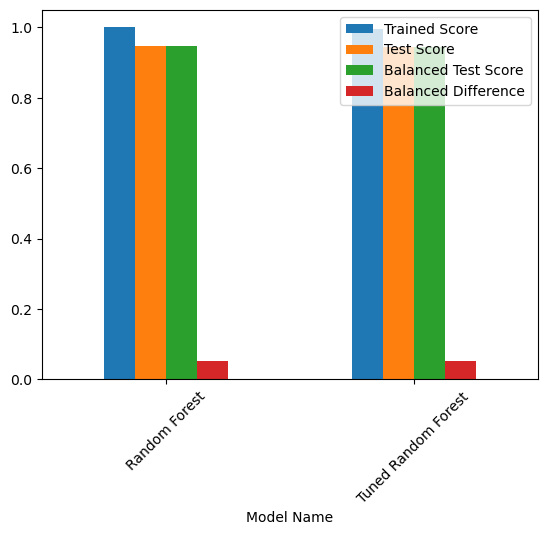

In [41]:
# Run combined data through many_models_min_leaf function to determine if ' min leaf' parameter setting is worth extra time.
# score and optimize Random Forest Classifier Model
print('Combined Data results min leaf')
models_min_leaf_combined = tests.many_models_min_leaf(X_train2,y_train2,X_test2,y_test2)

Combined Data results max leaf

Random Forest 
Test Accuracy: 0.9472527472527472
balanced test score: 0.9466560871974294
classification report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1278
           1       0.94      0.94      0.94       997

    accuracy                           0.95      2275
   macro avg       0.95      0.95      0.95      2275
weighted avg       0.95      0.95      0.95      2275

non-tuned models dataframe
               Trained Score  Test Score  Balanced Test Score  \
Model Name                                                      
Random Forest            1.0    0.947253             0.946656   

               Balanced Difference  
Model Name                          
Random Forest             0.053344  

Random Forest Parameter Tuning:
 
best depth balanced test score: 
    train_score  test_score  max_depth
17     1.000000    0.948271         18
16     1.000000    0.946766         17
13     0

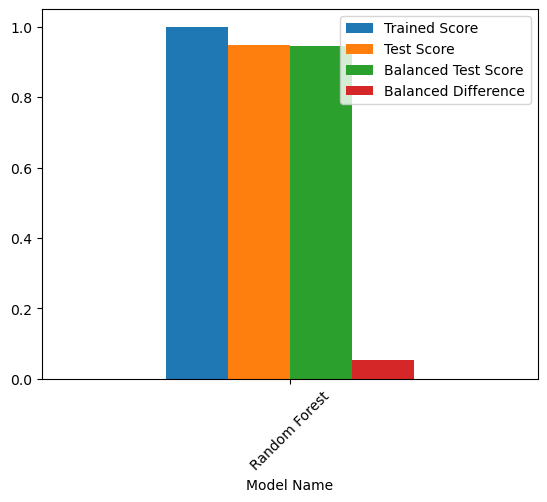

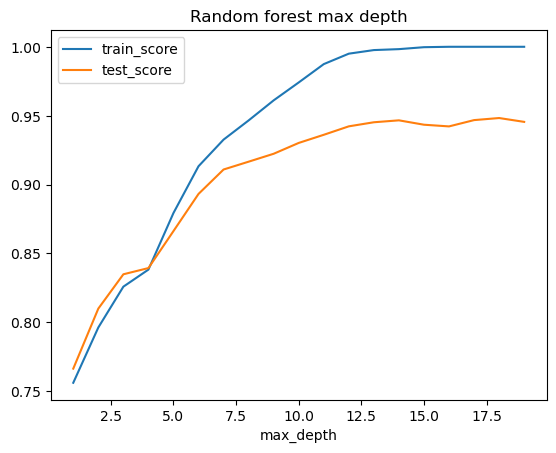

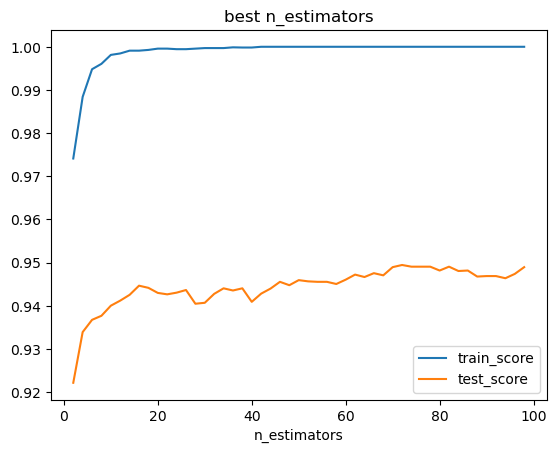

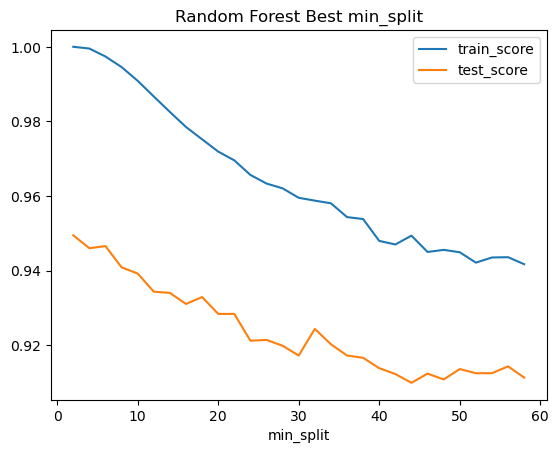

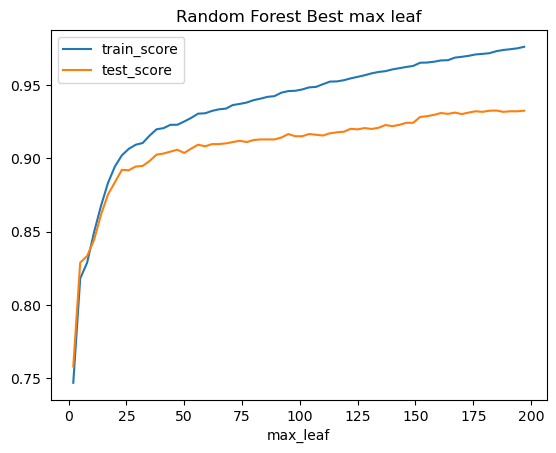

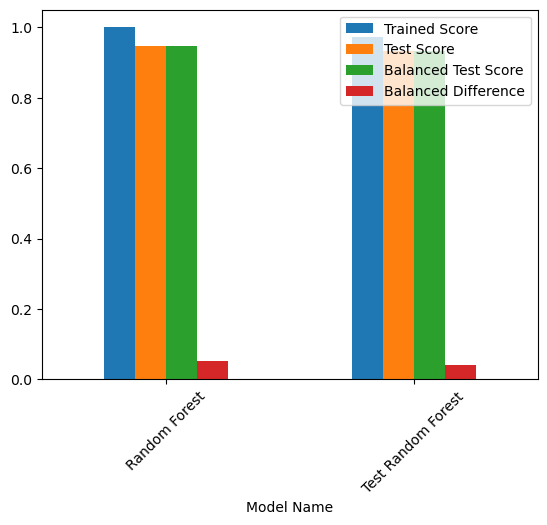

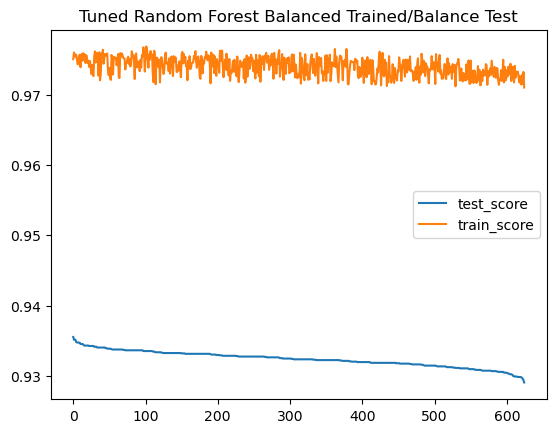

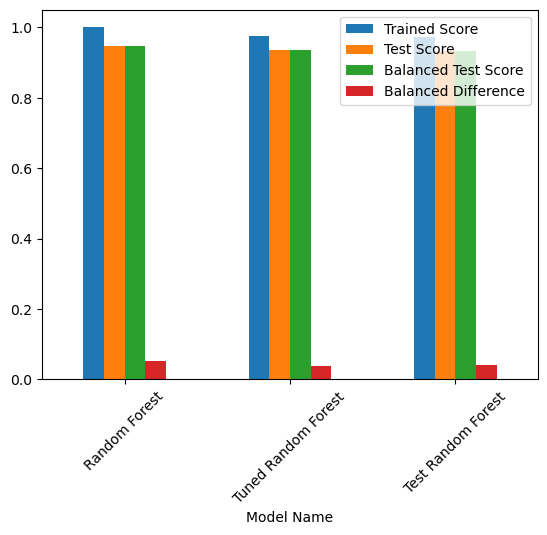

In [42]:
# Run combined data through many_models_max_leaf function to determine if 'no max leaf' parameter setting is worth extra time.
# score and optimize Random Forest Classifier Model
print('Combined Data results max leaf')
models_max_leaf_combined = tests.many_models_max_leaf(X_train2,y_train2,X_test2,y_test2)

### Visualizations of the baseline score, and three data processing ways.
Sampling and then binning the data was the best results showing a 93.3% balance test score, with a 3.9% balanced difference.

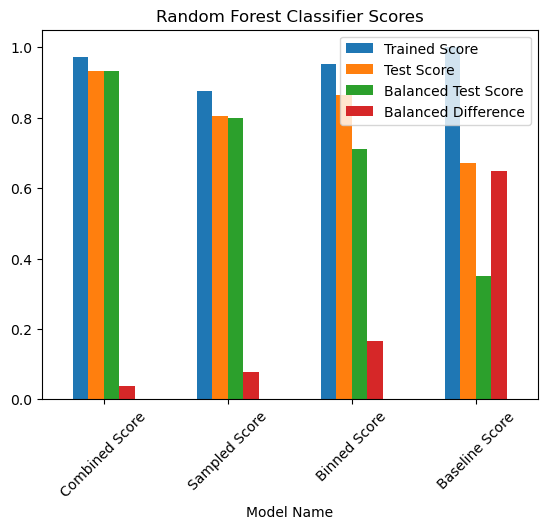

In [45]:
# Create Dataframe with models scores to visualize for presentation
results_df = pd.DataFrame(
    [
        ['Baseline Score', 1.000000, 0.672615, 0.351007, 0.648993],
        ['Binned Score', 0.951149, 0.865231, 0.711225, 0.167036],
        ['Sampled Score', 0.876923, 0.804835, 0.799328, 0.078897],
        ['Combined Score', 0.972601, 0.933626, 0.932433, 0.039073],
    ],
    columns=['Model Name','Trained Score', 'Test Score','Balanced Test Score','Balanced Difference']
).set_index('Model Name').sort_values(by='Balanced Test Score', ascending=False)

# Plot models scores on graph to visualize
results_df.plot(title='Random Forest Classifier Scores',kind='bar').tick_params(axis='x',rotation=45)

In [46]:
# Show results dataframe 
results_df

,Trained Score,Test Score,Balanced Test Score,Balanced Difference
Model Name,,,,
Combined Score,0.972601,0.933626,0.932433,0.039073
Sampled Score,0.876923,0.804835,0.799328,0.078897
Binned Score,0.951149,0.865231,0.711225,0.167036
Baseline Score,1.000000,0.672615,0.351007,0.648993
